In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import interpolate

In [2]:
path="/Users/namh2/OneDrive/Documentos/DOCTORADO/AJUSTES Y ERRORES LANE-EMDEN/Blok_McGaugh_Rubin_2001/"
data=np.loadtxt(path+"ESO3020120.dat")

In [3]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

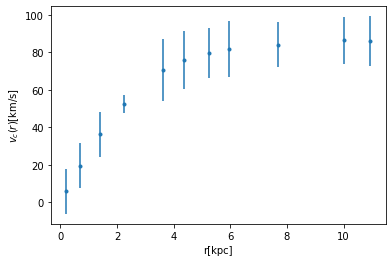

In [4]:
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [5]:
def Integrate(func,x0,y0,x,h):
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    #while x0 < x:
    while y0[0] < 5.000000000000:
    #while y0[0]>0.99:
        y0 = y0 + RK4(func,x0,y0,h) #update next value of y
        x0 = x0 + h #update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

Differential Equations with equation of state 


$$\begin{equation} m'=4\pi r^2\rho \qquad P'=-\frac{Gm\rho}{r^2} \qquad P=K\rho \qquad
 m'=4\pi\left(2.5188027\times10^{-3}\right)\frac{P}{K} \qquad P'=-\left(0.499246\times10^{-6}\right)\frac{m}{r^2}\frac{P}{K}
\end{equation}$$

In [6]:
def rhs(x,y):
    dy=np.zeros(2)
    dy[0]=4*np.pi*Gm*x**2*(y[1]/K)
    dy[1]=-Gp*y[0]/x**2*(y[1]/K)
    return dy

In [7]:
def model(data,v,X): #modelo, aqui solo da unidades e interpola 
    V = []
    x=X
    RC=v*np.sqrt(G)
    Int_l = interpolate.interp1d(x,RC)  
    for i in range(len(data)):
        if data[i] < x[-1]:
            v=Int_l(data[i])
            V.append(v)
        else:
            v=0.
            #v=np.sqrt(G*Y[:,0][-1]/(data[i]))
            V.append(v)
    return V,RC 

In [8]:
def Xi2(RCv_data,RCv_teo,RCev_data): #calcula el X²
    xi=np.sum((RCv_data-RCv_teo)**2./(RCev_data)**2.)
    return xi

In [9]:
Gm=2.5188027*10**(-3) #constantes a usar 
Gp=0.499246*10**(-6)
G=4.258*10**(4)
Gv=1.24*10**(5)
y0=np.zeros(2)
h=0.001
x0=0.00001
C_rate=32.444*10**(3)

In [70]:
#VALORES PARA LA VARIACION DE \sigma/m
K_min=1.1*10**(-8)
K_max=6.5*10**(-8)
Kvec=np.linspace(K_min,K_max,20)
p_0min=3.*10**(-8)
p_0max=45.5*10**(-8)
p_0=np.linspace(p_0min,p_0max,20)
sigma_min=0.1
sigma_max=3.5
sigmavec=np.linspace(sigma_min,sigma_max,20)

In [71]:
y0[0]=0. #condiciones iniciales
y0[1]=p_0[0]
K=K_min

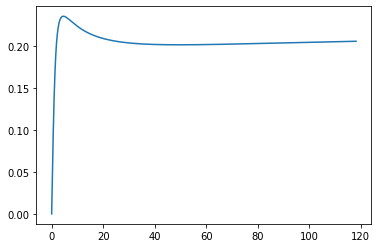

In [72]:
X,Y=Integrate(rhs,x0,y0,10.,h) #checar el tiempo de integración
v=np.sqrt(Y[:,0]/X)
plt.plot(X,v)

Text(0.5, 0, 'R[kpc]')

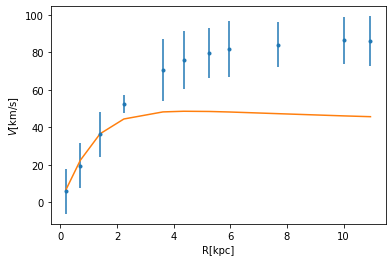

In [73]:
V,RC=model(RCr_data,v,X) #checar que toma todos los puntos
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.plot(RCr_data,V)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")

Condición 

$\frac{\sigma}{m}v\rho t_{age}\approx 1 \qquad v=\sqrt{K}c$

$(2\frac{cm^2}{g})\sqrt{K}(3\times10^{10}\frac{cm}{s})(\rho\frac{GeV}{cm^3})(3.1536\times10^{17}s)(\frac{1.989\times10^{33}g}{1M_{\odot}})(\frac{1M_{\odot}}{1.16\times10^{57}GeV})=$

$(2)(3)\frac{(3.1536)(1.989)}{1.16}\times10^{10+17+33-57}\sqrt{K}\tilde{\rho}=32.444\times10^{3}\sqrt{K}\tilde{\rho}=32.444\times10^3\sqrt{k}\frac{P}{K}$

$rate=C_{rate}\sqrt{K}\frac{P}{K}$

Si se cumple se debe guardar el radio $r_1$ y debemos considerar la densidad como sigue

$\rho(r) = 
  \left \{
    \begin{aligned}
      P/K &,\ \text{si} \ r < r_1 \\
      \rho_s(r/r_s)^{-1}(1+r/r_s)^{-2} &,\ \text{si} \ r > r_1
    \end{aligned}
  \right .$

$r_s=-r\frac{\rho'r_1+3\rho}{\rho'r_1+\rho}$

$\rho_s=-4(\rho'r_1+\rho)(\frac{\rho}{\rho'r_1+3\rho})^3$

donde los valores de $\rho->\rho(r_1)$ y $\rho'->\rho'(r_1)$ se encuentran al evaluar el valor de $r_1$

# Vamos a variar a $\frac{\sigma}{m}$

$rate=(\frac{\sigma}{m})^{*}C_{rate}\frac{P}{2\sqrt{K}}$

In [127]:
%%time 
#calcula el valor minimo de P y K, minimo X²
xi_minimo=10000
xi = np.zeros((len(p_0),len(Kvec),len(sigmavec))) 
for l in range(0,len(Kvec)):
    K=Kvec[l]
    for i in range(0,len(p_0)):
        x0=0.00001
        y0[0]=0.
        y0[1]=p_0[i]
        X,Y=Integrate(rhs,x0,y0,10.,h) #aquí ya se integraron las ecuaciones \rho=P/K
        r_1=1000000
        for p in range(0,len(sigmavec)):
            sigma=sigmavec[p]
            rate=sigma*C_rate*np.sqrt(K)*Y[:,1]/(2.*K)
            rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K))/(K*(X**2))
            indr_1=0
            for j in range (0,len(rate)):
                if (rate[j]>=1.0): # AQUI ES LA CONDICION DE QUE rate=1 y guarda el indice para buscar la densidad
                    r_1=X[j]
                    indr_1=j
            rho_1=Y[indr_1,1]/K #densidad que corresponde al r1
            rhop_1=rho_prima[indr_1]#es la derivada de la densidad para sustituir en r_s y rho_s
            rho_s=-4.*(rhop_1*r_1+rho_1)*(rho_1/(rhop_1*r_1+3.*rho_1))**(3.0) 
            r_s=-r_1*(rhop_1*r_1+3.*rho_1)/(rhop_1*r_1+rho_1)
            k=0
            j=0
            v_m=np.zeros(len(X))
            m_nfw=np.zeros(len(X))
            for k in range(0,len(X)):
                if (k<indr_1):
                    v_m[k]=np.sqrt(Y[k,0]/X[k])
                else :
                    m_nfw[k]=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log((1.0+X[k]/r_s)/(1.0+r_1/r_s))+(r_1/r_s-X[k]/r_s)/((1.0+X[k]/r_s)*(1.0+r_1/r_s)))
          #          if ((-m_nfw[k]+Y[indr_1,0])/X[k] )<0:
           #             print(k,-m_nfw[k], Y[indr_1+k,0] )
                    v_m[k]=np.sqrt((m_nfw[k]+Y[indr_1+j,0])/X[k])
                    j=j+1 
            V,RC=model(RCr_data,v_m,X)
            xi[i,l,p]=Xi2(RCv_data,V,RCev_data)
            if (xi[i,l,p] < xi_minimo):
                xi_minimo=xi[i,l,p]
                p0_minimo=p_0[i]
                K_minimo=Kvec[l]
                sigma_minimo=sigmavec[p]        

<timed exec>:36: RuntimeWarning: invalid value encountered in sqrt
<timed exec>:33: RuntimeWarning: invalid value encountered in log


KeyboardInterrupt: 

In [81]:
print(Y[:,0])
print(np.sqrt())

[0.00000000e+00 7.60929316e-11 5.99747666e-10 ... 4.99977145e+00
 4.99999886e+00 5.00022627e+00]


In [82]:
print(X)

[1.000000e-05 1.010000e-03 2.010000e-03 ... 1.742801e+01 1.742901e+01
 1.743001e+01]


In [83]:
print(m_nfw)

[0.         0.         0.         ... 1.51265426 1.51286235 1.51307043]


In [125]:
print((18.0+X/r_s)/(1.0+r_1/r_s))

[ 7.94833167  7.94851578  7.9486999  ... 20.71936422 20.71954834
 20.71973245]


In [124]:
print((m_nfw+Y[indr_1,0])/X)

[-7.43606070e+03 -7.36242531e+01 -3.69951076e+01 ...  4.29909196e-02
  4.29905438e-02  4.29901681e-02]


In [79]:
rho_minimo=p0_minimo/K_minimo
print(xi_minimo)
print(K_minimo)
print(p0_minimo)
print(rho_minimo)
print(sigma_minimo)

0.3061110006534307
1.9526315789473687e-08
5.2368421052631585e-08
2.6819407008086253
0.9947368421052631


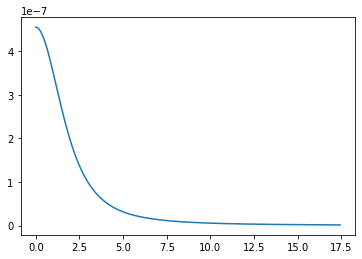

In [77]:
plt.plot(X,Y[:,1]) #checamos la forma de radio vs presión

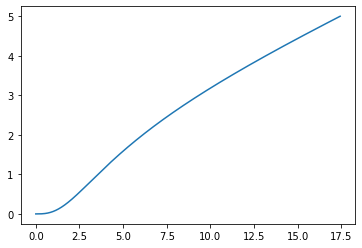

In [78]:
plt.plot(X,Y[:,0]) #checamos la forma de radio vs masa

In [87]:
y0[0]=0. #condiciones iniciales
y0[1]=p0_minimo
K=K_minimo 
sigma=sigma_minimo
X,Y=Integrate(rhs,x0,y0,10.,h)

Differential equations for $\rho$
$$ \rho'=-\frac{Gm\rho}{Kr^2} \qquad \rho''=C\left(4\pi r^3\rho-\frac{Gm^2}{Kr}-2m\right)=0
$$

In [88]:
#aqui escribimos rho' y rho'' y la CONDICION rate,
rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K_minimo))/(K_minimo*(X**2))  #calculamos la derivada rho'
rho_biprima=4*np.pi*X*X*(Y[:,1]/K_minimo)-((G*Y[:,0]*Y[:,0])/(K_minimo*X))-2*Y[:,0] #segunda derivada rho''
rate=sigma*C_rate*Y[:,1]/(2.*np.sqrt(K_minimo))
print(rate)

[6.04744498e+00 6.04744223e+00 6.04743559e+00 ... 1.07402154e-03
 1.07399300e-03 1.07396447e-03]


In [89]:
r_1=100000 
for i in range (0,len(rate)):
    if (rate[i]>=1.0): # AQUI ES LA CONDICION DE QUE rate=1 y guarda el indice para buscar la densidad
        r_1=X[i]
        indr_1=i
rho_1=Y[indr_1,1]/K_minimo #densidad que corresponde al r1
rhop_1=rho_prima[indr_1]#es la derivada de la densidad para sustituir en r_s y rho_s
rho_s=-4.*(rhop_1*r_1+rho_1)*(rho_1/(rhop_1*r_1+3.*rho_1))**(3.0) 
r_s=-r_1*(rhop_1*r_1+3.*rho_1)/(rhop_1*r_1+rho_1)
print(r_1)
print(rho_1)
print(rhop_1)
print(r_s)

3.033009999999777
0.4437621169826297
-0.3097183431775666
2.398344098988119


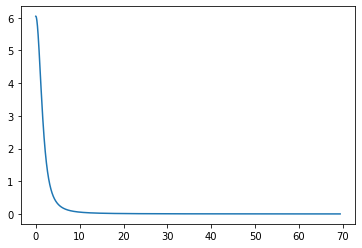

In [90]:
plt.plot(X,rate) #grafica de rate, donde se comprueba que cuando rate=1 obtenemos el r1

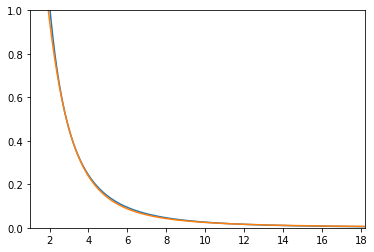

In [91]:
#AQUI COMPROBAMOS LAS DENSIDADES "ver que pegan en r1"
rho_nfw=rho_s*(X/r_s)**(-1.0)*(1+X/r_s)**(-2.0) 
plt.plot(X,rho_nfw)
plt.plot(X,Y[:,1]/K_minimo)
plt.xlim([1.,18.2])
plt.ylim([0,1.0002])
plt.show()

$\rho'_{NFW}=-\frac{\rho_s}{r_s}(r/r_s)^{-2}(1+r/r_s)^{-3}(1+3r/r_s)$

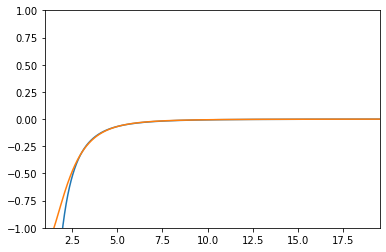

In [92]:
#ahora checamos que pegue las derivadas de la densidad (valores muy grandes)
rhop_nfw=-(rho_s/r_s)*((X/r_s)**(-2.0))*((1.0+X/r_s)**(-3.0))*(1.0+(3.0*X)/r_s)
rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K_minimo))/(K_minimo*(X**2))
plt.plot(X,(rhop_nfw))
plt.plot(X,(rho_prima))
plt.xlim([1.,19.5])
#plt.ylim([-.5*10**(9),.1*10**(9)])
plt.ylim([-1,1])
plt.show()

$M=4\pi r_s^{3}\rho_s((\ln(\frac{1+R/r_s}{1+r_1/r_s}))+\frac{r_1/r_s-R/r_s}{(1+R/r_s)(1+r_1/r_s)})$

$M=4\pi(25.1880\times10^{-4}) r_s^{3}\rho_s((\ln(1+R/r_s)-\frac{R/r_s}{1+R/r_s})$

[-0.32547413 -0.32547402 -0.32547369 ...  2.73090905  2.73092598
  2.7309429 ]


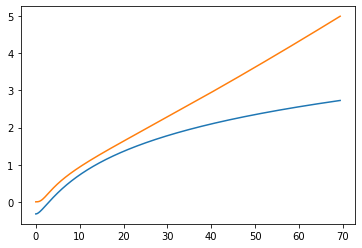

In [93]:
#es la masa al integrar la densidad de r1 a R
m_nfw=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log((1.0+X/r_s)/(1.0+r_1/r_s))+(r_1/r_s-X/r_s)/((1.0+X/r_s)*(1.0+r_1/r_s)))
M_nfw=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log(1+X/r_s)-(X/r_s)/(1+(X/r_s)))
plt.plot(X,m_nfw)
plt.plot(X,Y[:,0])
print(m_nfw)
plt.show()

C:\Users\namh2\AppData\Local\Temp/ipykernel_17404/3646143653.py:2: RuntimeWarning: invalid value encountered in sqrt
  v_nfw=np.sqrt(m_nfw/X)


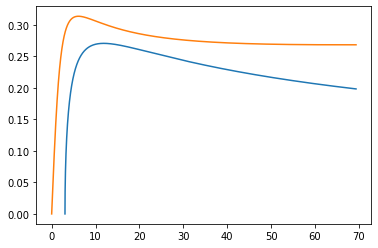

In [94]:
#aqui se muestran las velocidades
v_nfw=np.sqrt(m_nfw/X)
v_c=np.sqrt(Y[:,0]/X)
plt.plot(X,v_nfw)
plt.plot(X,v_c)
#print(v_nfw)
plt.show()

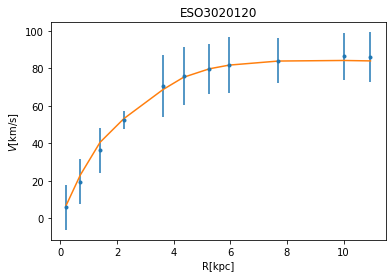

In [100]:
#intento pegar las velocidades.
y0[0]=0.
y0[1]=p0_minimo
K=K_minimo
X,Y=Integrate(rhs,x0,y0,10.,h)
v_m=np.zeros(len(X))
l=0
j=0
for l in range(0,len(X)):
    if (l<indr_1):
        v_m[l]=np.sqrt(Y[l,0]/X[l])
    else :
        v_m[l]=np.sqrt((m_nfw[l]+Y[indr_1+j,0])/X[l])
        j=j+1
V_m,RC_m=model(RCr_data,v_m,X)
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
#plt.plot(RCr_data,V)
#plt.plot(RCr_data,V1)
plt.plot(RCr_data,V_m)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")
plt.title("ESO3020120")
#plt.savefig("RCESO3020120.jpg")
#plt.savefig("RCESO3020120.pdf")
plt.show()

## Calculos del core

-1.1480568039782584 -0.0


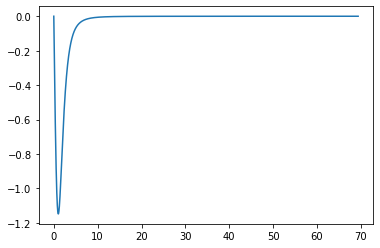

In [101]:
plt.plot(X,rho_prima) # esto es para el core
minimo=np.min(rho_prima) # calculamos el minimo de rho_prima
maximo=np.max(rho_prima) #calculamos el maximo de rho_biprima
print(minimo,maximo)

In [102]:
rho_c=100000
r_c=100000  # buscamos el valor de X que corresponde al rho' minimo que hace que rho''= 0 punto de inflexión de rho
for i in range (0,len(rho_prima)):
    if (rho_prima[i]<=rho_c):
        rho_c=rho_prima[i]
        r_c=X[i]
print(rho_c)
print(r_c)

-1.1480568039782584
1.0270099999999978


Equations
$$\begin{equation}
       T=\frac{Km}{k_B} \qquad  \langle v^{2}\rangle=\frac{3k_BT}{m} \qquad \langle v \rangle =\sqrt{\frac{8k_BT}{\pi m}}
\end{equation}$$

In [103]:
k_B=8.617333262*10**(-5) # constante de Boltzmann
m=1.00*10**(6)  # masa de la particula 1GeV
T=(K_minimo*m)/(k_B) 
print(T)

226.59348542987433


In [104]:
v2=3*k_B*T/m
print(np.log(v2))

-16.652890464837306


In [105]:
v_cr=np.sqrt(8*k_B*T/(np.pi*m))
print(v_cr)

0.00022298734235890832


In [106]:
xis=np.zeros((len(p_0),len(Kvec)))     #P vs K
for l in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        xis_minimo=10000
        for i in range(0,len(sigmavec)):
            if (xi[i,l,j] < xis_minimo):
                xis_minimo = xi[i,l,j]
                xis[l,j]=xi[i,l,j]

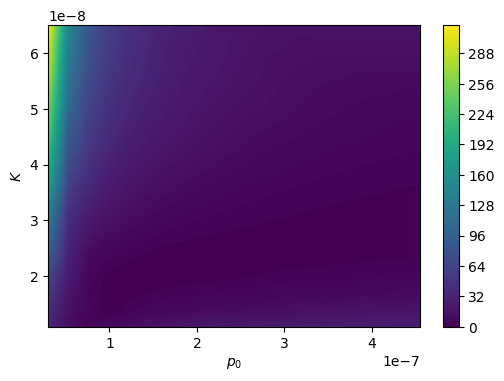

In [107]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xis,200,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();

In [108]:
diffxi2= np.zeros((len(p_0),len(Kvec)))
xicl = np.zeros((len(p_0),len(Kvec)))
for l in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        #if ((xin[l,j] ) <= 0.1388414874789144+2.30):
        diffxi2[l,j]=xis[l,j]-xi_minimo
        if ((diffxi2[l,j] ) <= 6.2502018013):
            xicl[l,j]=diffxi2[l,j]

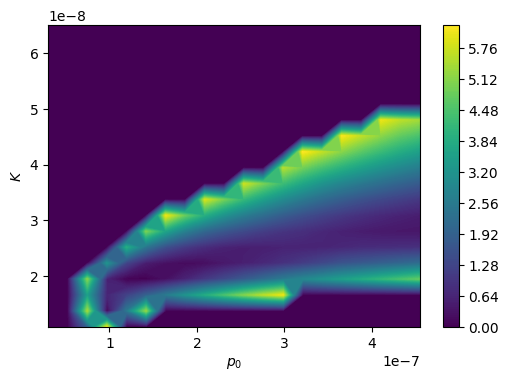

In [109]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xicl,200,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();

Text(0.5, 0, '$\\chi^2$')

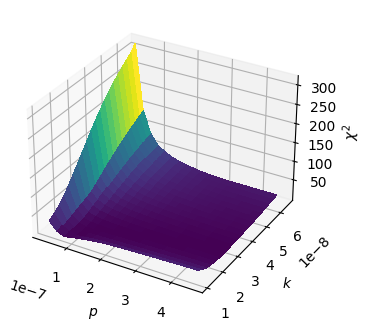

In [110]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=100)
surf = ax.plot_surface(x,y,xis,cmap='viridis',linewidth=0,antialiased=False)
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$k$')
ax.set_zlabel(r'$\chi^2$')

In [111]:
xiK=np.zeros((len(p_0),len(sigmavec)))     #P vs sigma/m
for l in range(0,len(p_0)):
    for j in range(0,len(sigmavec)):
        xiK_minimo=10000
        for i in range(0,len(Kvec)):
            if (xi[i,l,j] < xiK_minimo):
                xiK_minimo = xi[i,l,j]
                xiK[l,j]=xi[i,l,j]

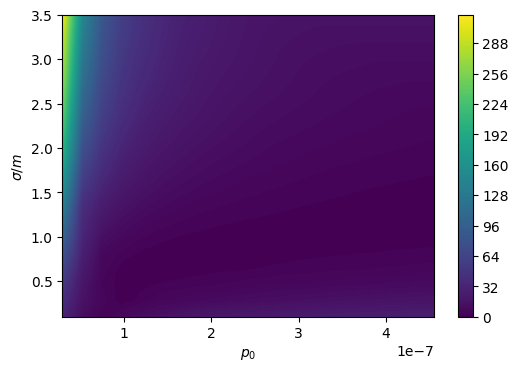

In [112]:
x,y = np.meshgrid(p_0,sigmavec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xiK,200,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$\sigma/m$')
plt.colorbar();

Text(0.5, 0, '$\\chi^2$')

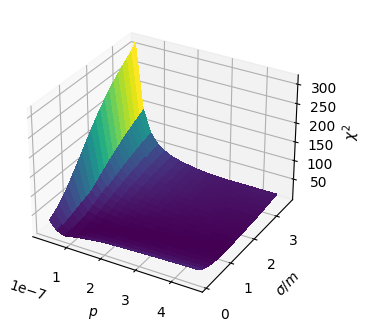

In [113]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=100)
surf = ax.plot_surface(x,y,xis,cmap='viridis',linewidth=0,antialiased=False)
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\sigma/m$')
ax.set_zlabel(r'$\chi^2$')

In [114]:
xiP=np.zeros((len(Kvec),len(sigmavec)))     #K vs sigma/m
for l in range(0,len(Kvec)):
    for j in range(0,len(sigmavec)):
        xiP_minimo=10000
        for i in range(0,len(p_0)):
            if (xi[i,l,j] < xiP_minimo):
                xiP_minimo = xi[i,l,j]
                xiP[l,j]=xi[i,l,j]

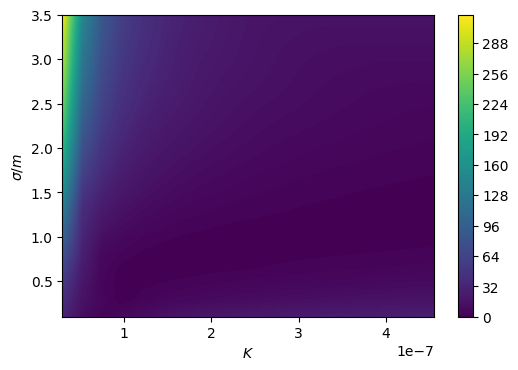

In [115]:
x,y = np.meshgrid(p_0,sigmavec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xiP,200,cmap='viridis')
plt.xlabel(r'$K$')
plt.ylabel(r'$\sigma/m$')
plt.colorbar();

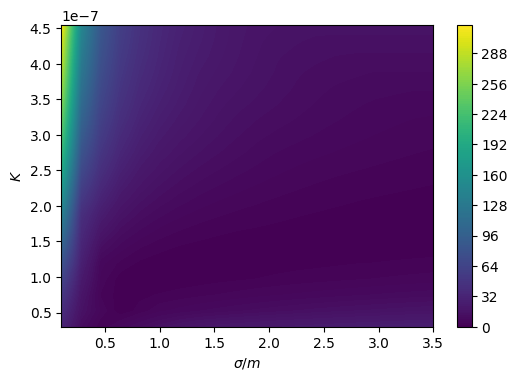

In [116]:
x,y = np.meshgrid(sigmavec,p_0)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xiP,200,cmap='viridis')
plt.ylabel(r'$K$')
plt.xlabel(r'$\sigma/m$')
plt.colorbar();

Text(0.5, 0, '$\\chi^2$')

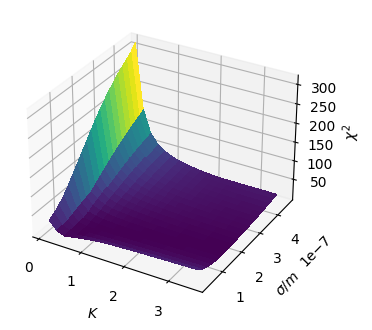

In [117]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=100)
surf = ax.plot_surface(x,y,xiP,cmap='viridis',linewidth=0,antialiased=False)
ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$\sigma/m$')
ax.set_zlabel(r'$\chi^2$')

## Proyección de $\chi^2$ para sacar la grafica $\sigma/m$ vs $\chi^2$

In [118]:
xip=100000  
xisigma=np.zeros(len(sigmavec))
for m in range(0,len(sigmavec)):
    for i in range(0,len(p_0)):
        for j in range(0,len(Kvec)):
            if (xi[i,j,m]<=xip):
                xisigma[m]=xi[i,j,m]     

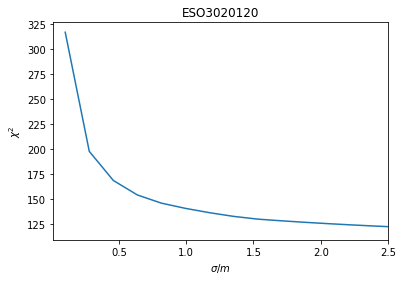

In [119]:
plt.plot(sigmavec,xisigma)
plt.xlabel(r'$\sigma/m$')
plt.ylabel(r'$\chi^2$')
plt.title("ESO3020120")
plt.xlim([0.01,2.5])
#plt.savefig("VARS-ESO3020120.jpg")
#plt.savefig("VARS-ESO3020120.pdf")
archivo = open("sigmaVSxiESO3020120.txt", "w")
for elemento1, elemento2 in zip(sigmavec, xisigma):
    linea = f"{elemento1} {elemento2}\n"
    archivo.write(linea)
archivo.close()
plt.show()

In [120]:
long=1000000
r=np.zeros(long)
kapa=np.zeros(long)
dx=np.zeros(long)
c=0
for i in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        r[c]=p_0[i]/Kvec[j]
        kapa[c]=Kvec[j]
        dx[c]=xicl[i,j]
        c=c+1       

In [121]:
print(c)
vec1=np.zeros(c)
vec2=np.zeros(c)
vec3=np.zeros(c)
for i in range(0,len(vec1)):
    if (dx[i]!=0.0):
        vec1[i]=r[i]
        vec2[i]=kapa[i]
        vec3[i]=dx[i]

400


In [122]:
np.savetxt("xi2ESO3020120particionVar.txt",np.transpose([vec1,vec2,vec3]))